# **Keras Tuner**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn import datasets
from imblearn.over_sampling import SMOTE

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

## Importing Dataset

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Portfolio/100 DAYS OF DL/diabetes.csv')

## Basic Data Exploration

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Univariate Analysis

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
for i in df.columns:
  print(i,len(df[i].unique()))

Pregnancies 17
Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52
Outcome 2


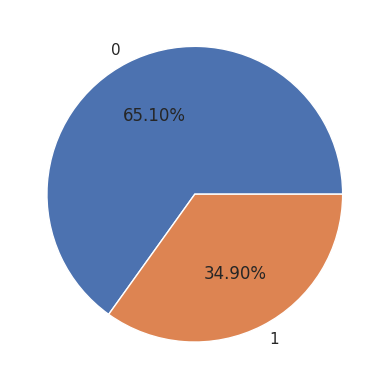

In [11]:
plt.pie(df['Outcome'].value_counts(),labels = df['Outcome'].value_counts().index,autopct='%1.2f%%')
plt.show()

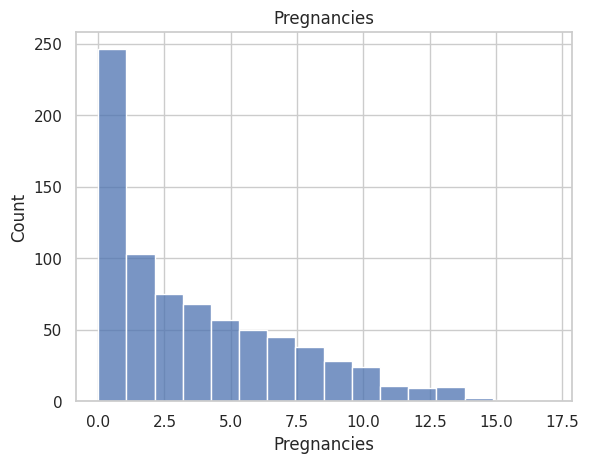

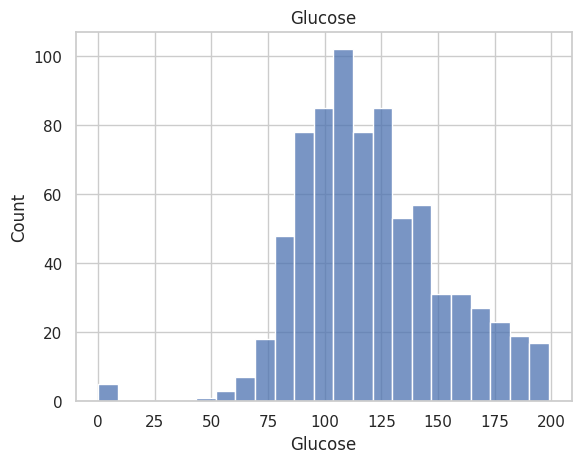

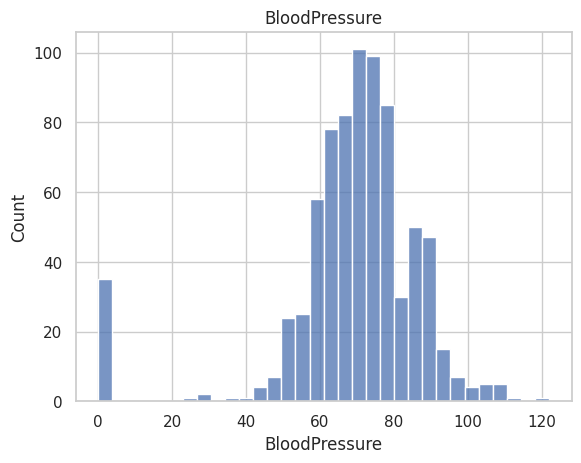

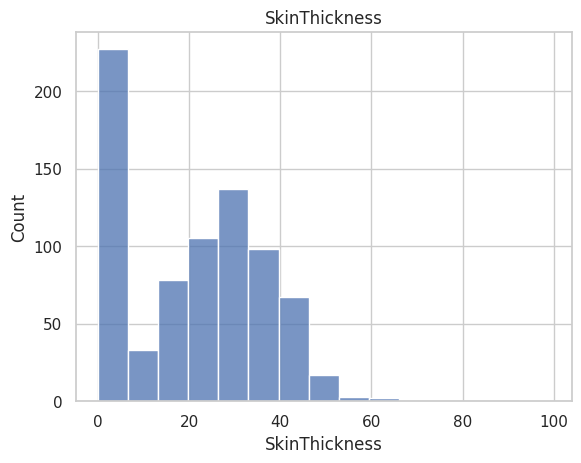

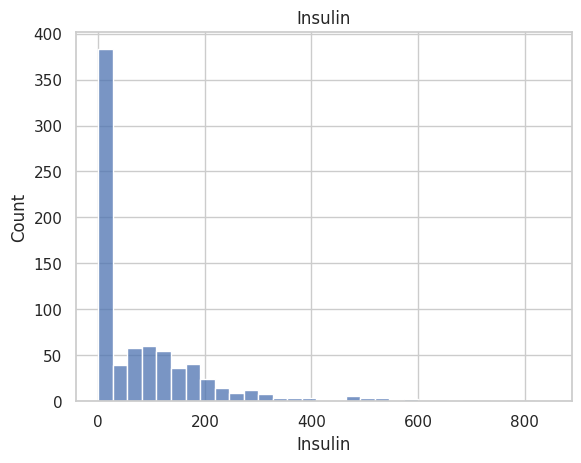

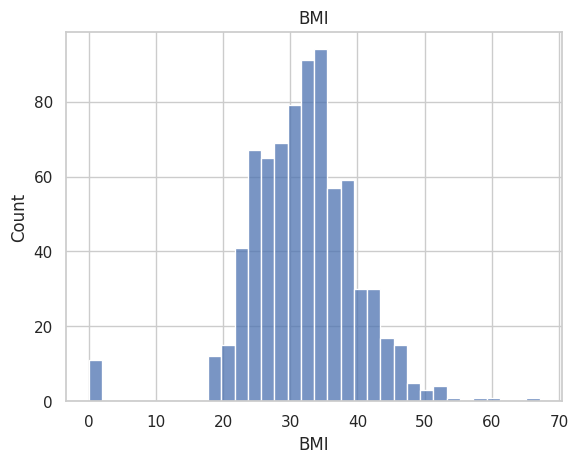

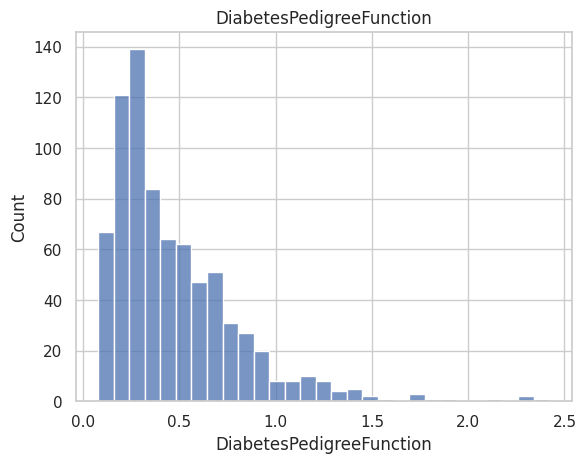

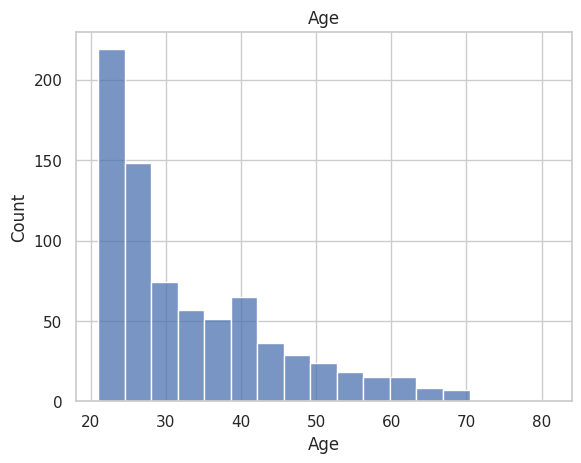

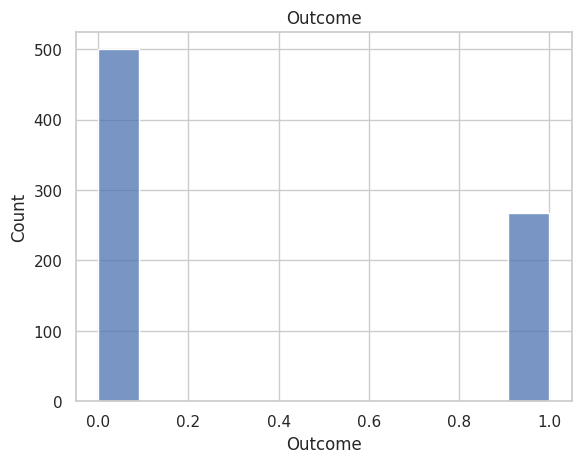

In [12]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
       sns.histplot(df[i])
       plt.title(i)
       plt.show()

# Bi-Variate Analysis

In [13]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

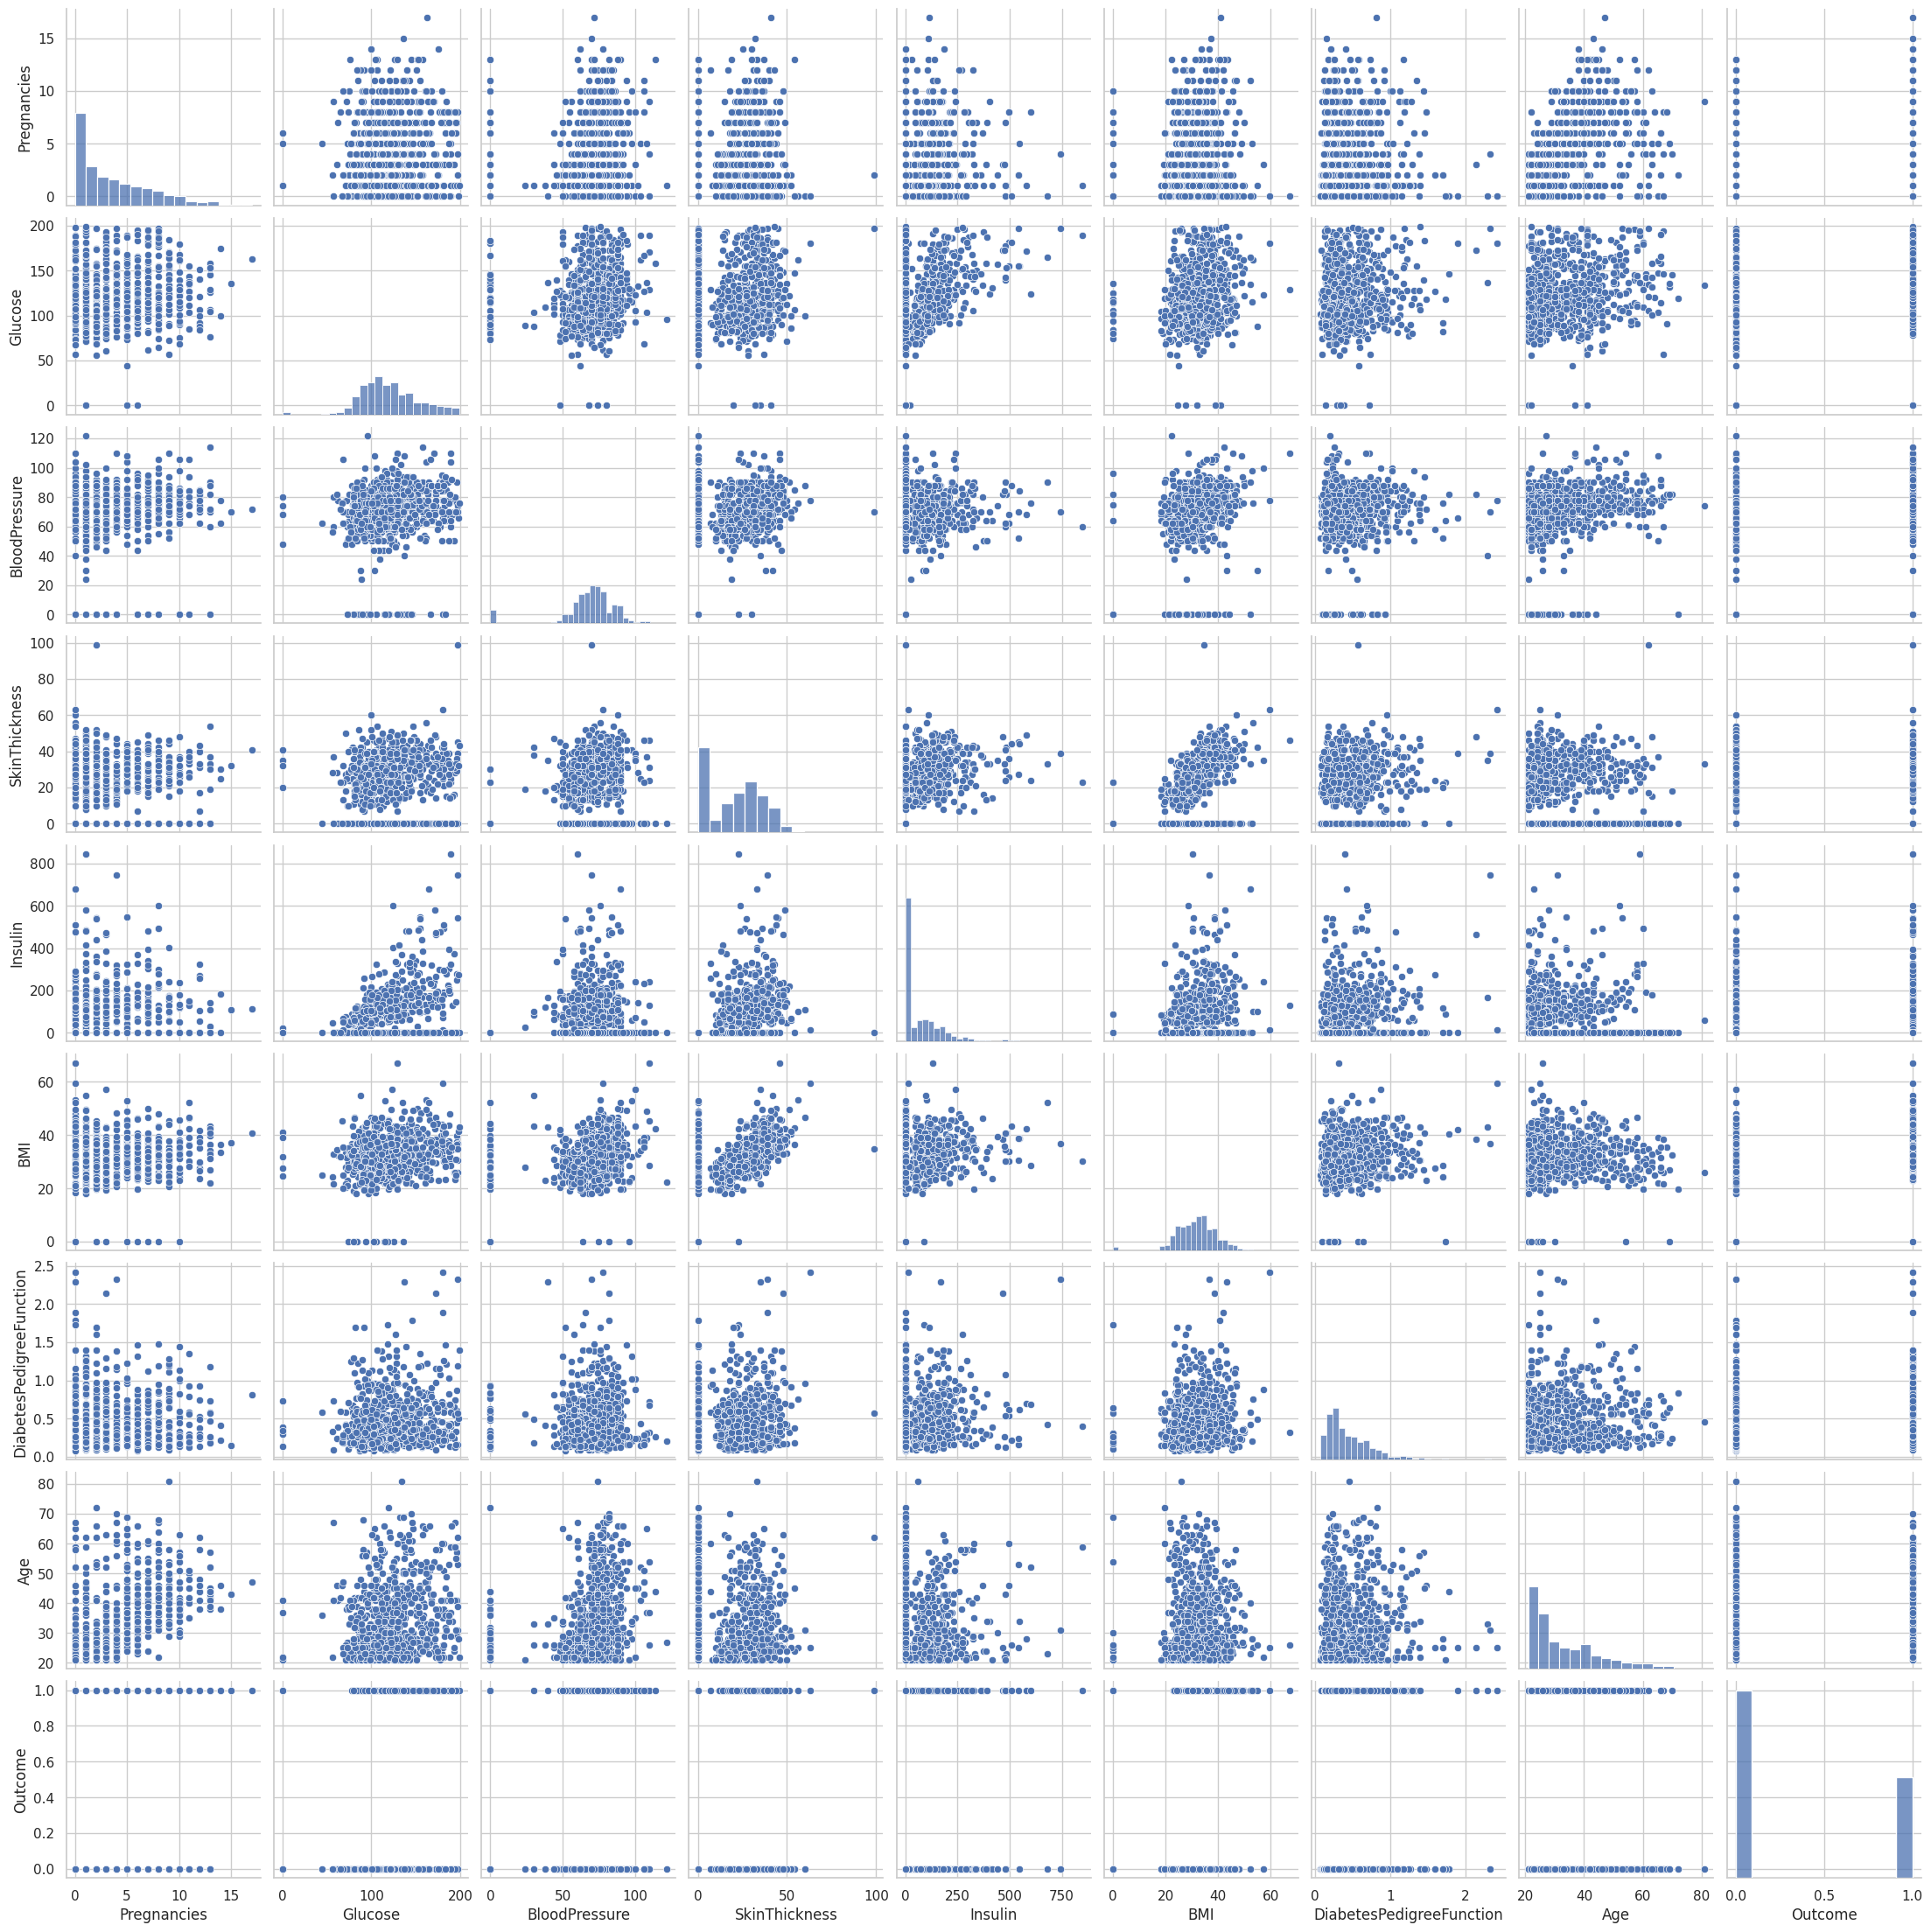

In [14]:
sns.pairplot(df)

<Axes: >

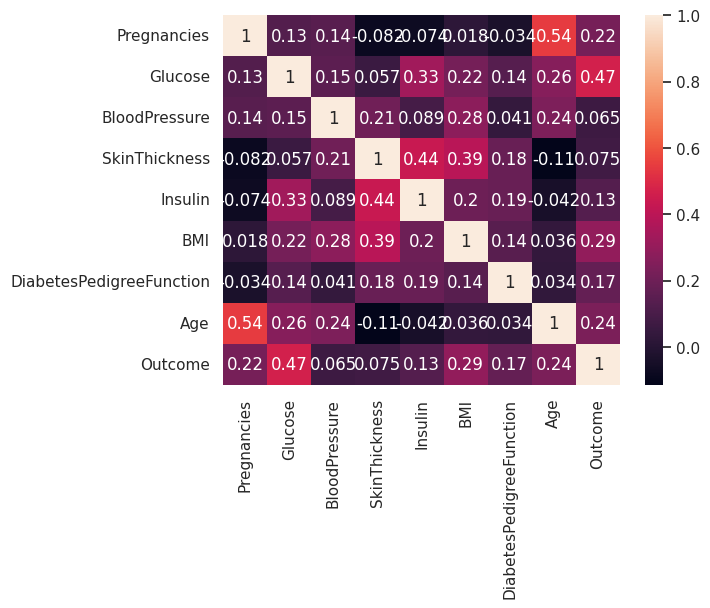

In [15]:
sns.heatmap(df.corr(),annot = True)

# Multi Variate

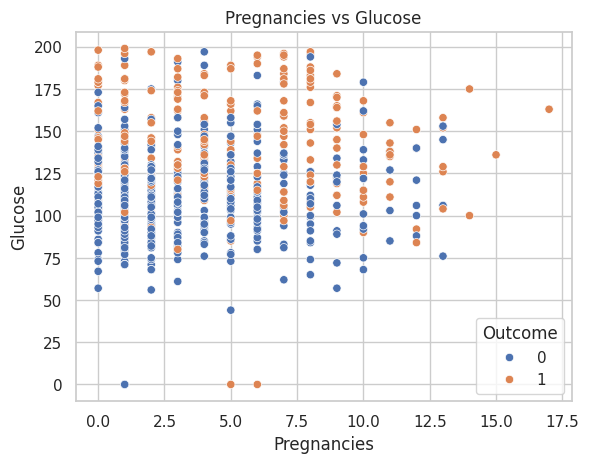

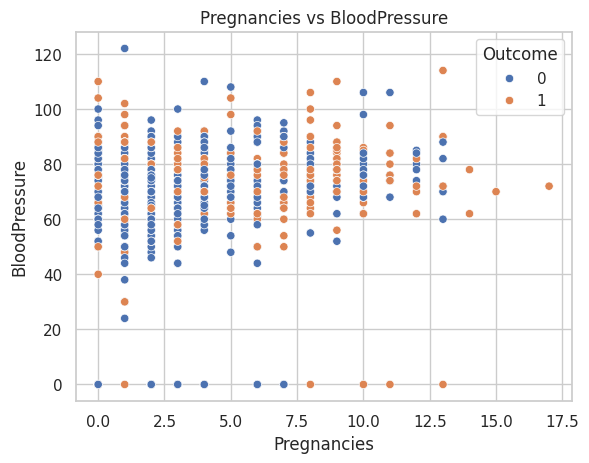

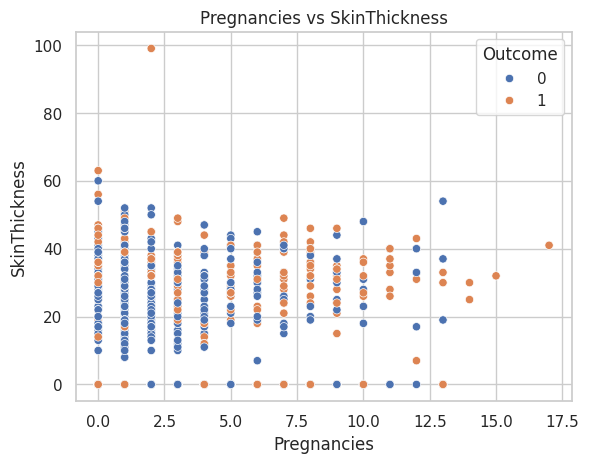

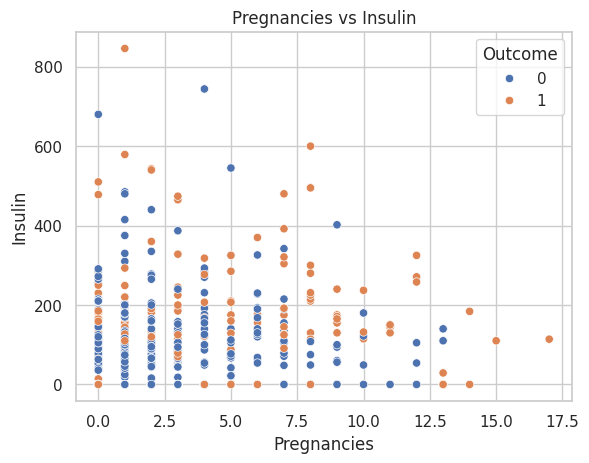

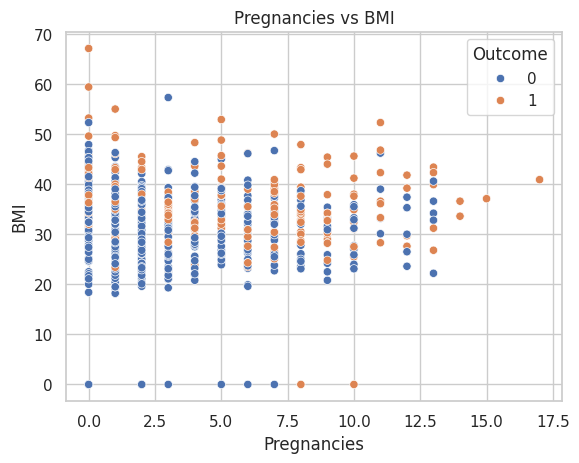

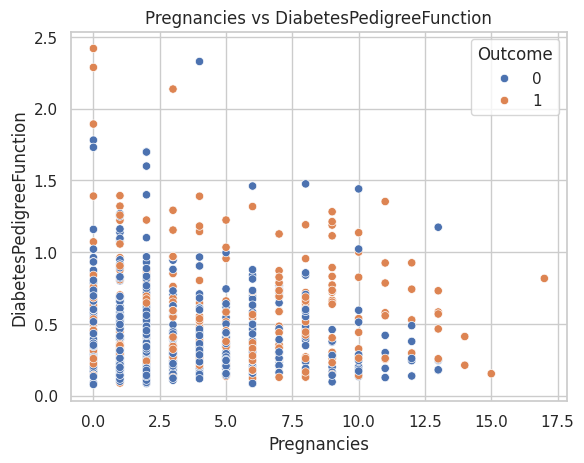

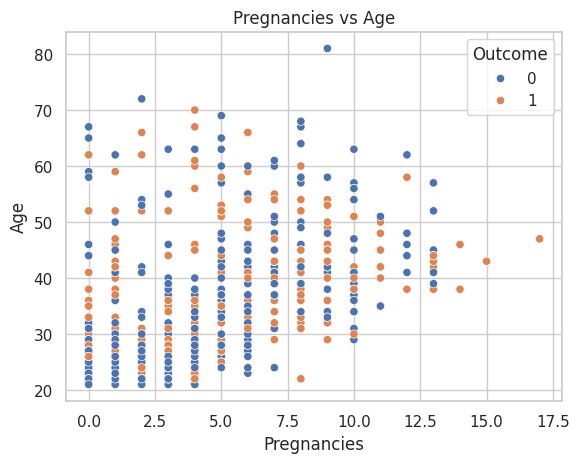

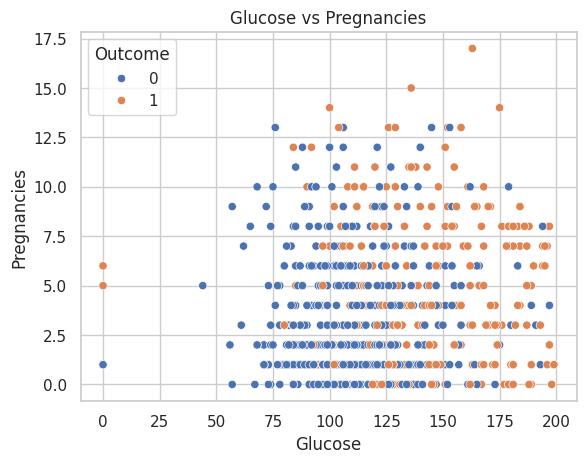

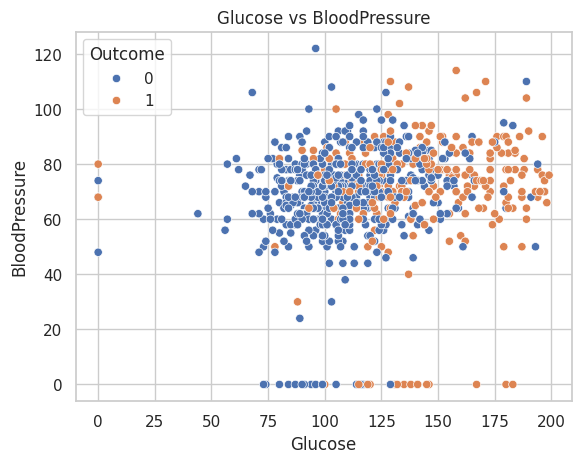

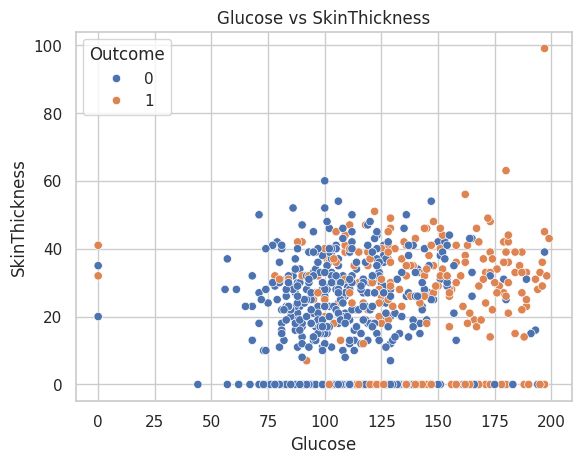

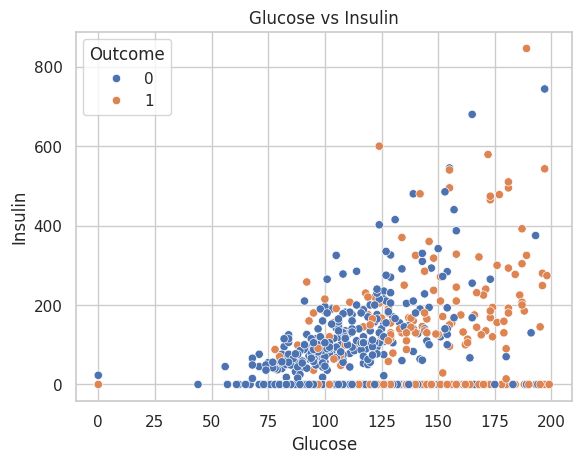

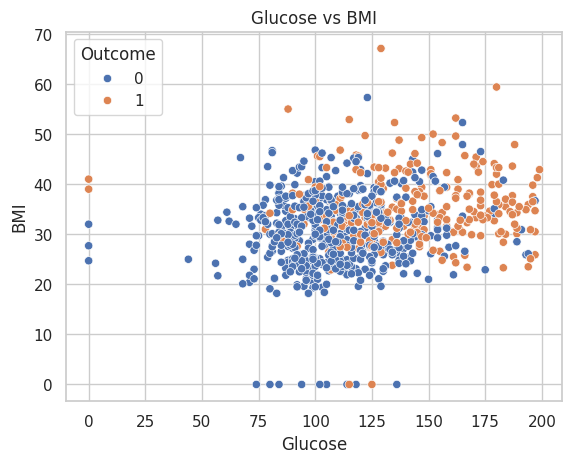

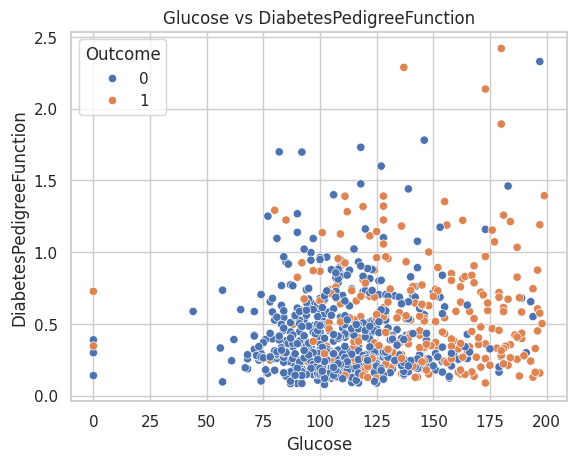

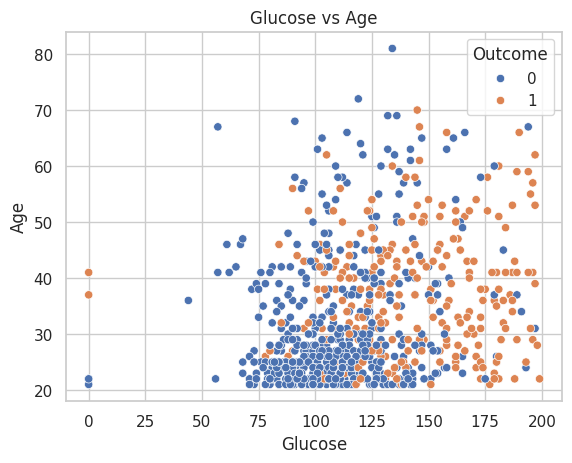

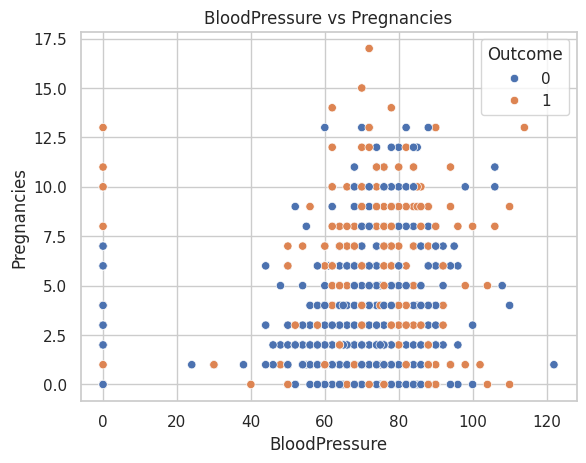

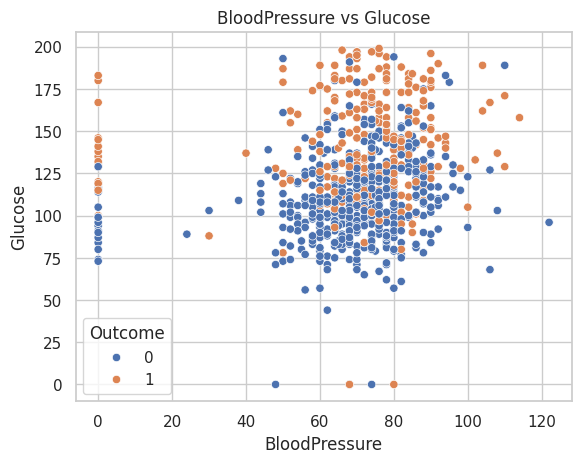

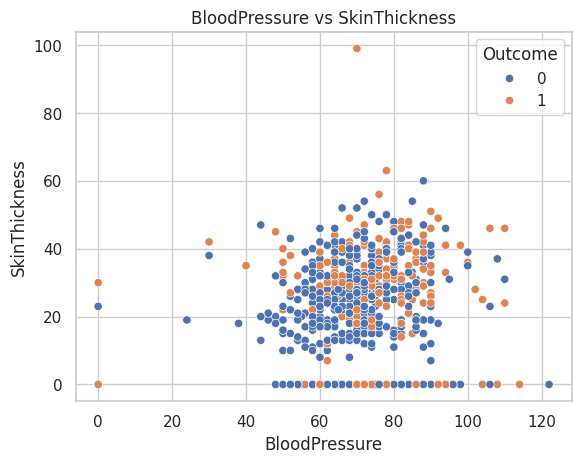

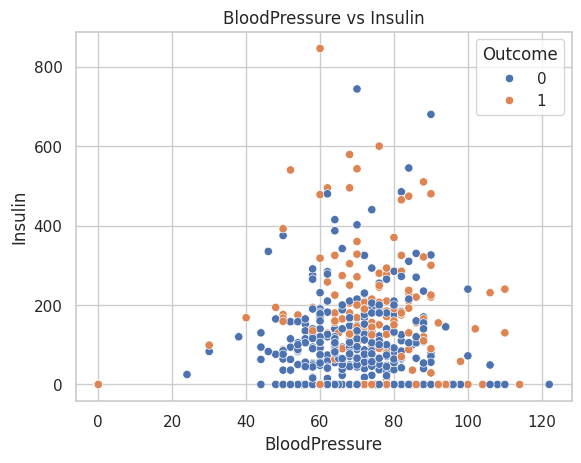

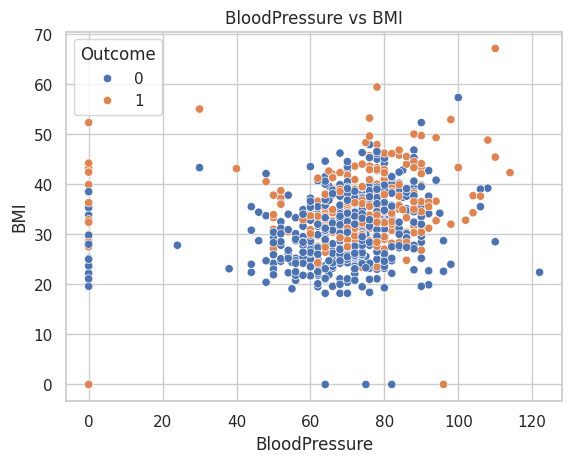

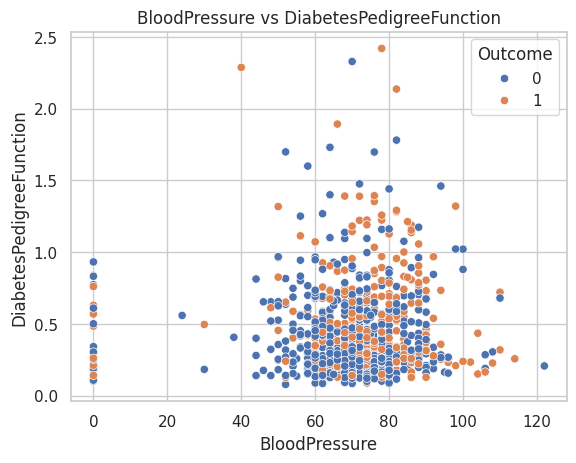

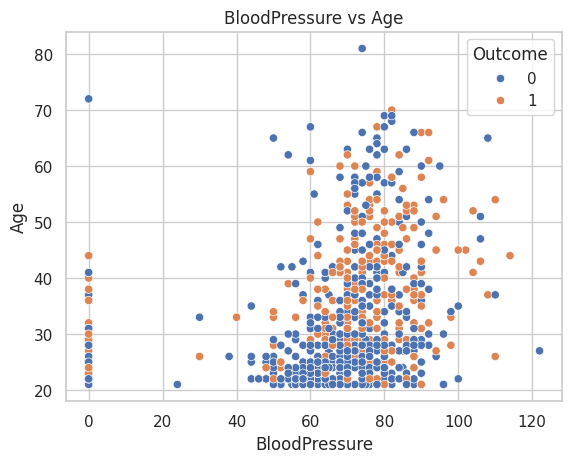

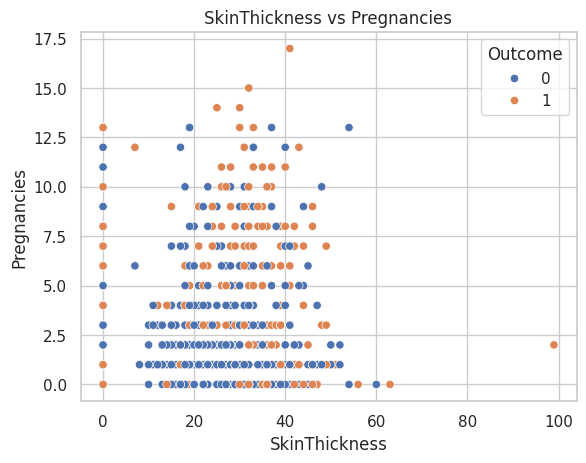

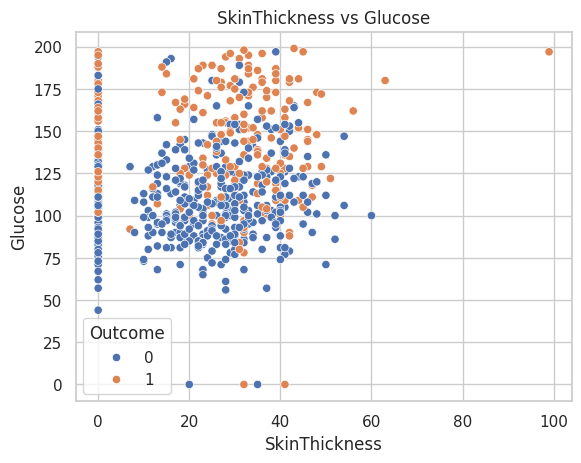

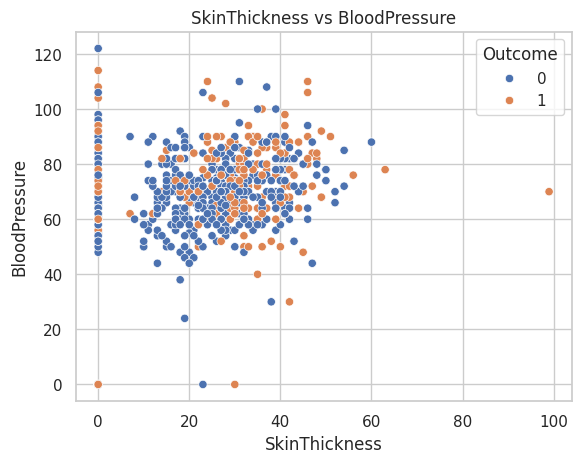

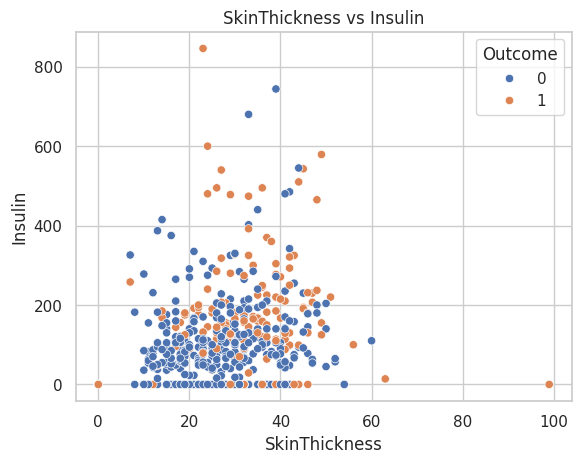

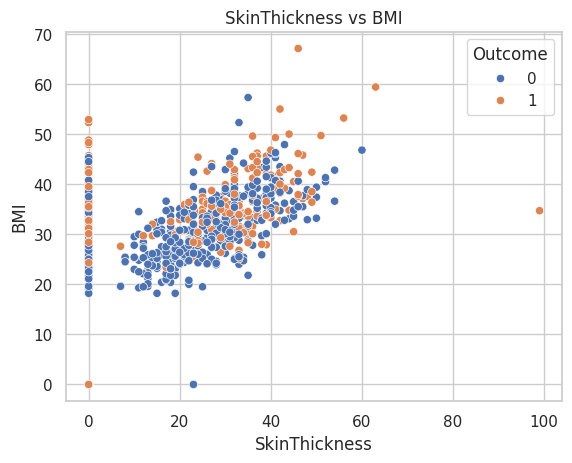

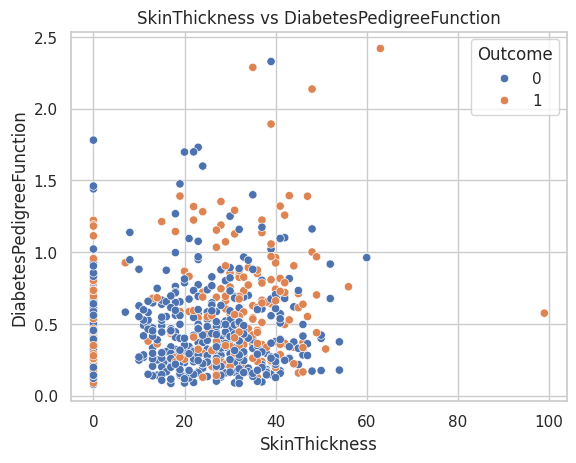

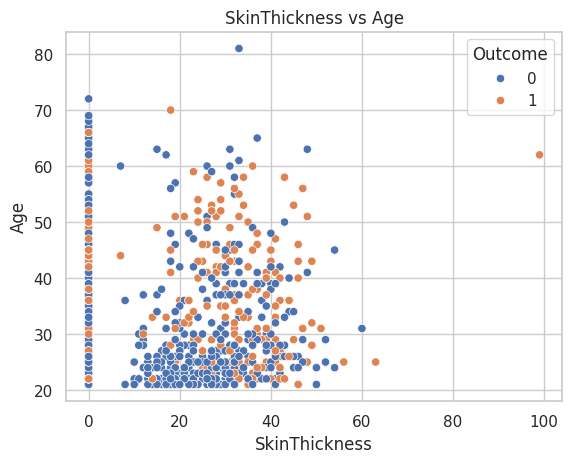

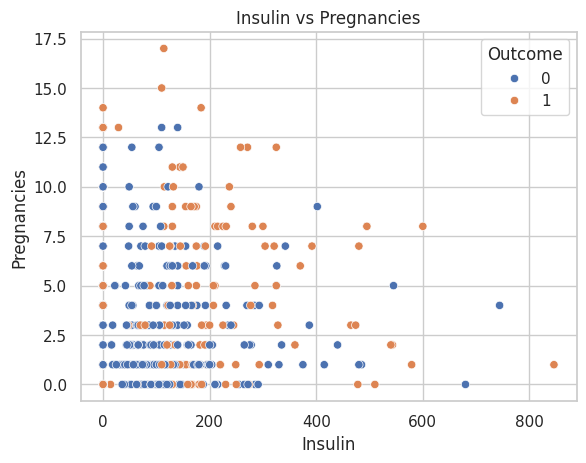

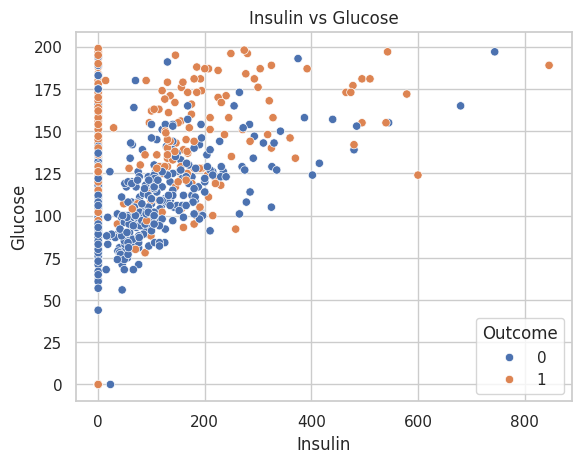

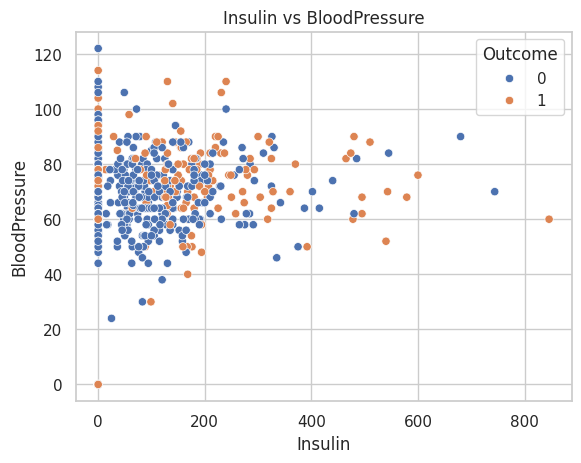

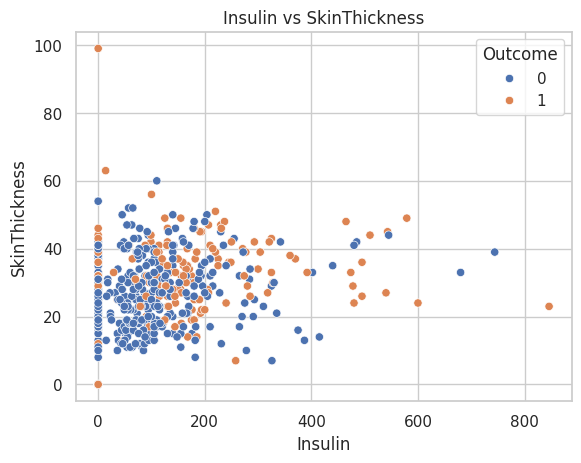

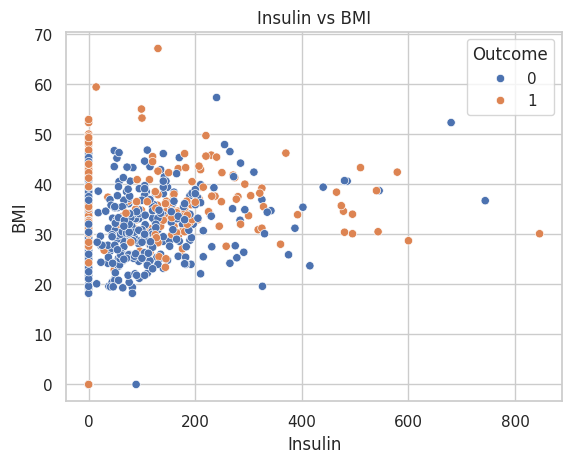

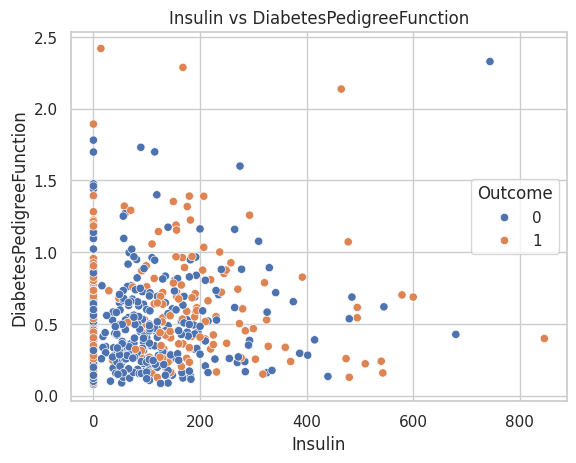

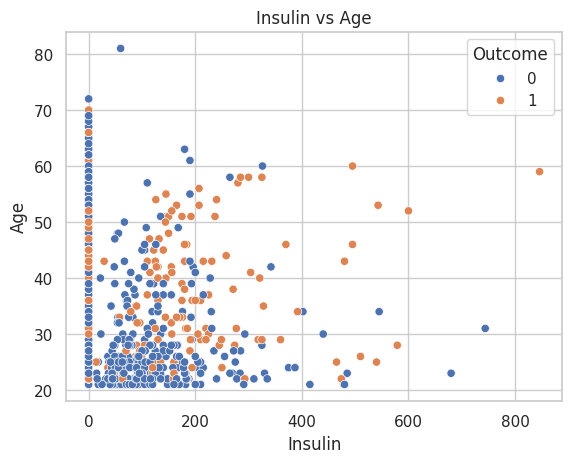

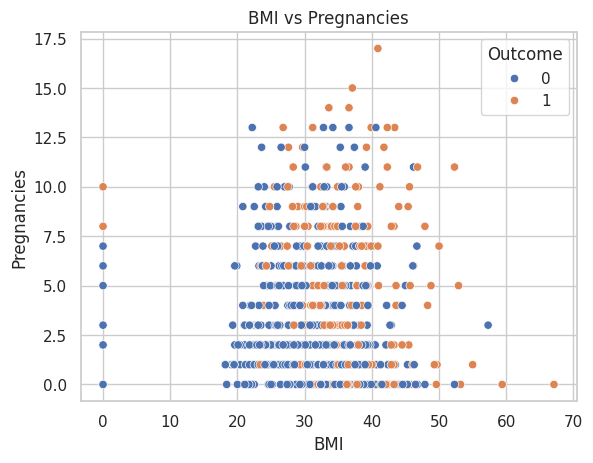

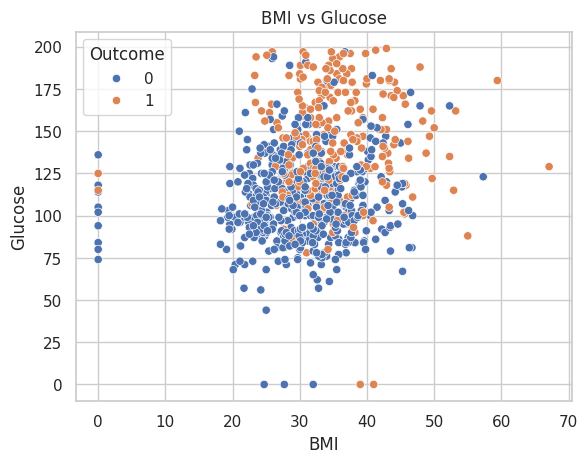

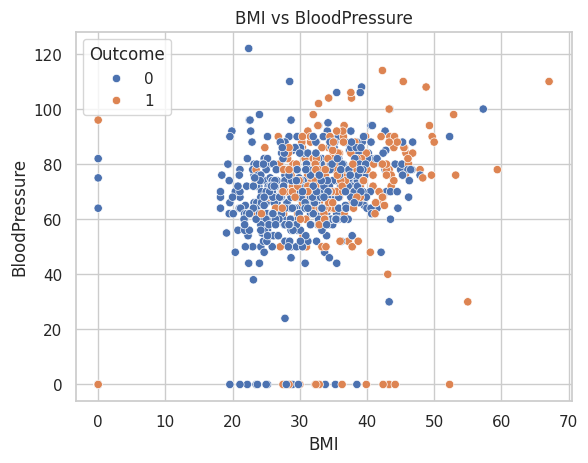

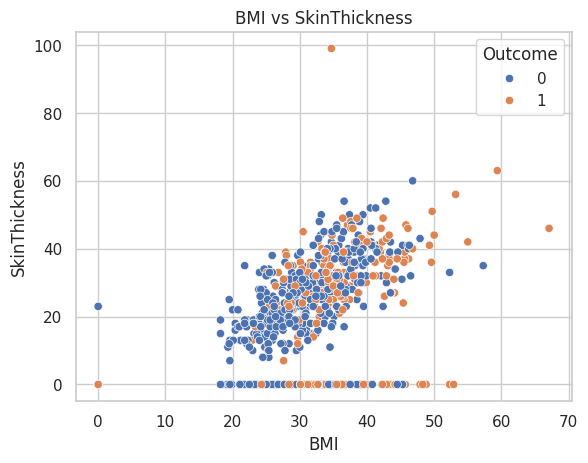

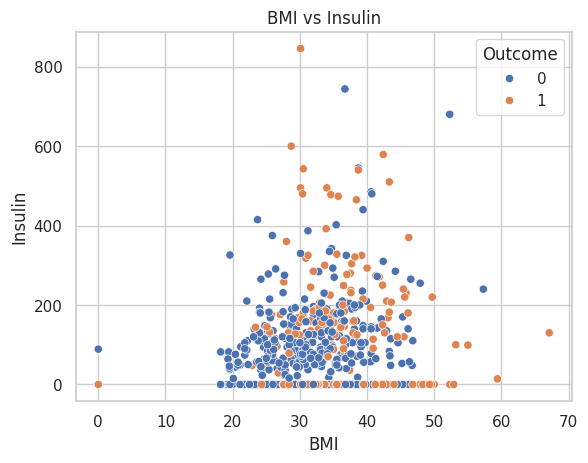

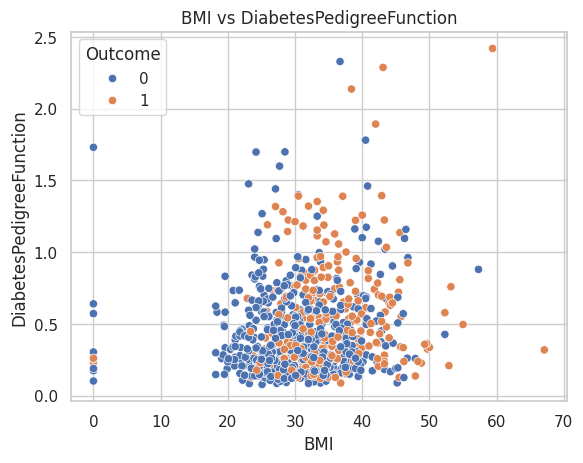

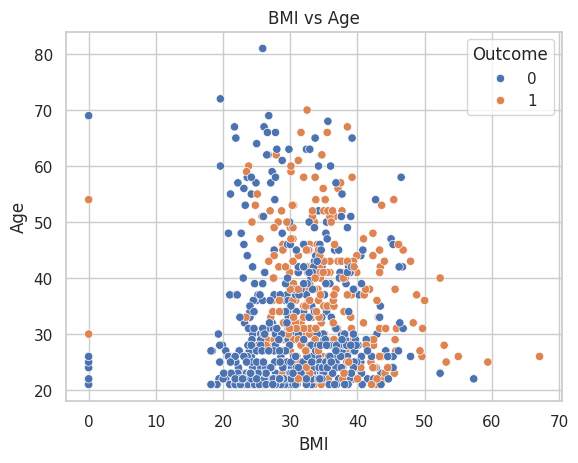

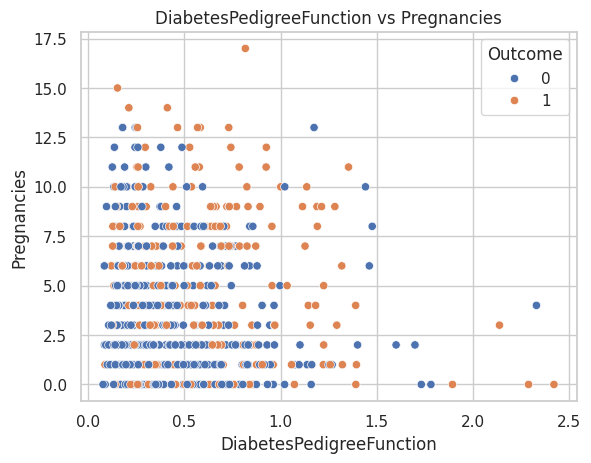

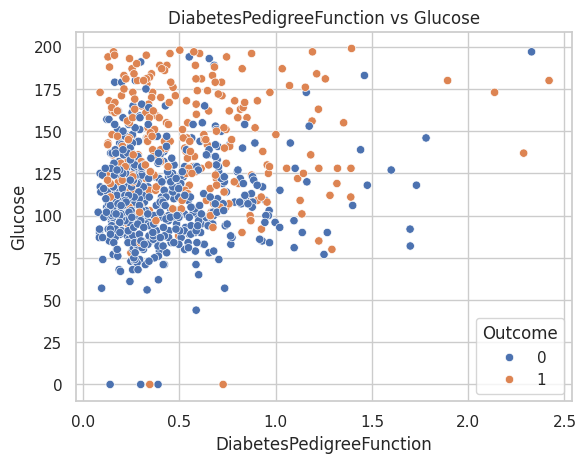

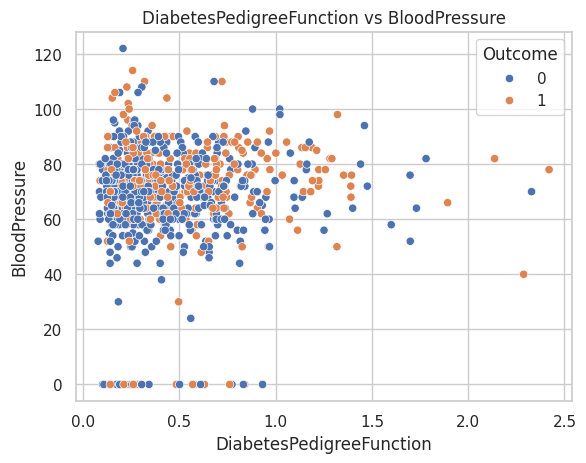

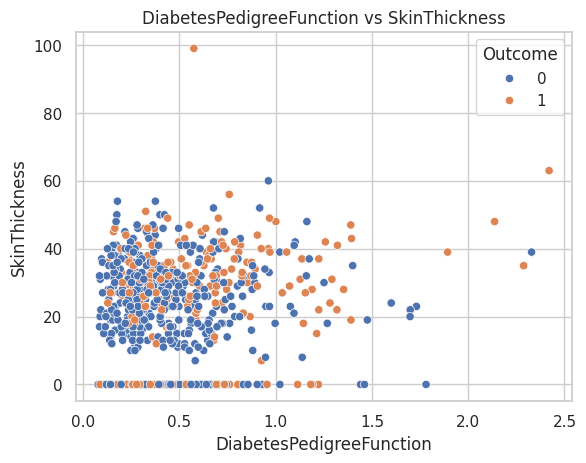

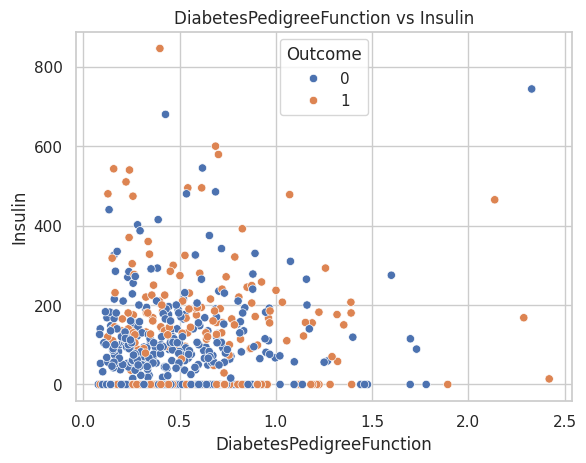

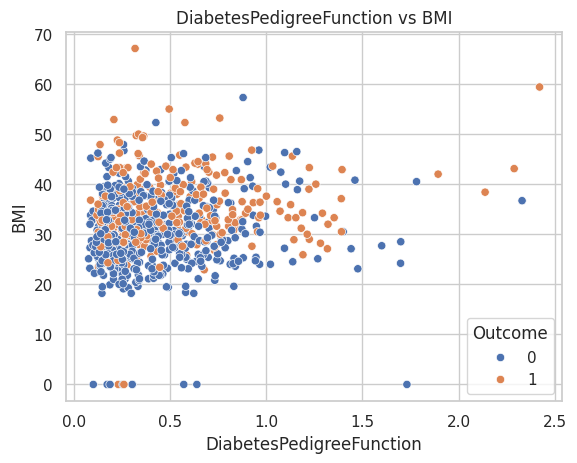

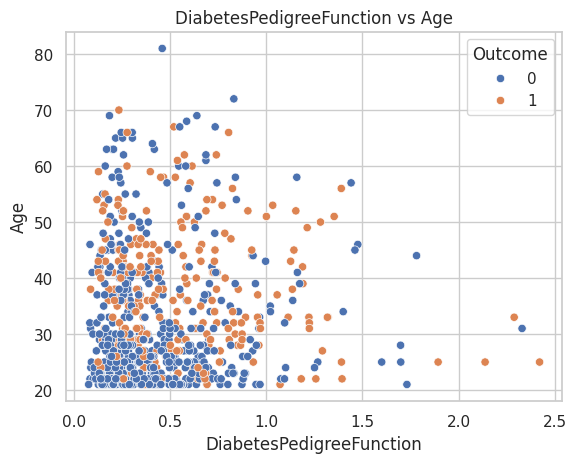

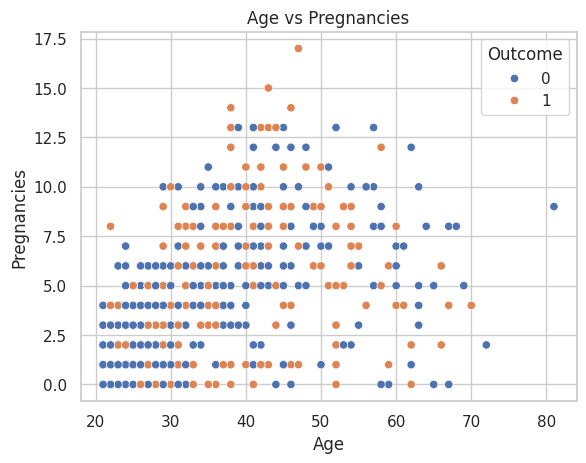

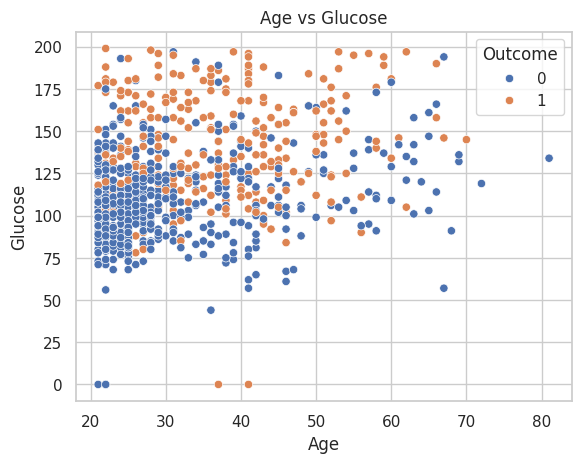

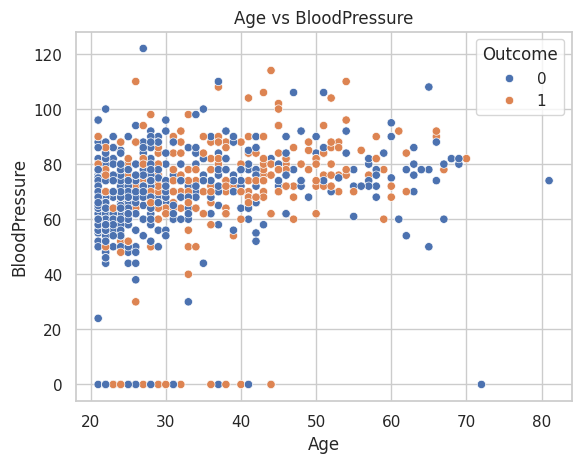

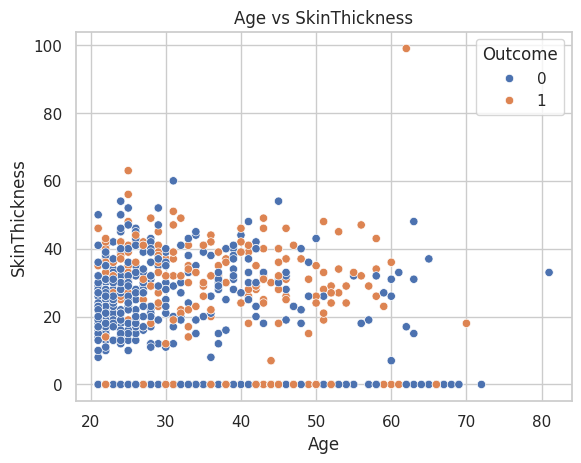

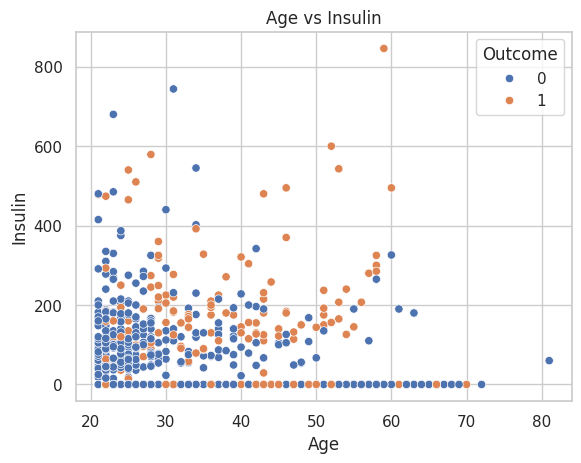

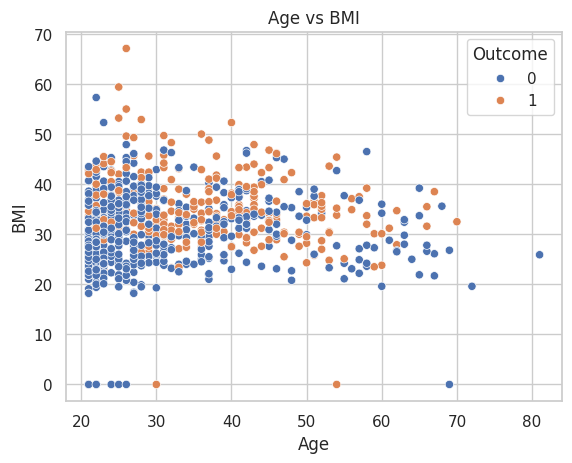

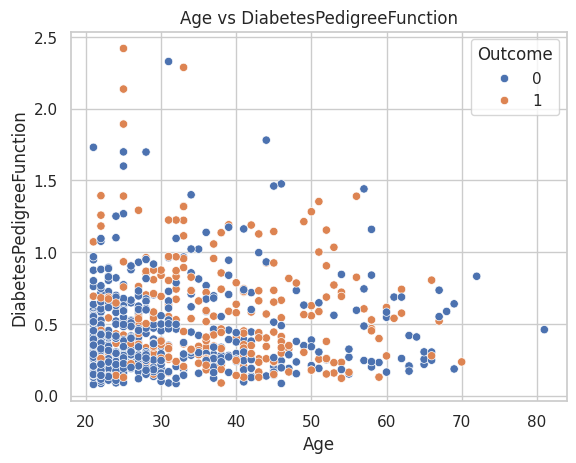

In [16]:
for i in df.columns:
  for j in df.columns:
    if (i != j) and (i != 'Outcome') and (j != 'Outcome'):
      sns.scatterplot(x = i,y = j,data = df,hue='Outcome')
      plt.title(f'{i} vs {j}')
      plt.show()

# Creating feature set and Target Variable

In [17]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [18]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Scaling

In [20]:
x = StandardScaler().fit_transform(x)

# Training and Validation Data

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

# Model

In [23]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4223 - loss: 0.8441 - val_accuracy: 0.5519 - val_loss: 0.7078
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4919 - loss: 0.7566 - val_accuracy: 0.5974 - val_loss: 0.6465
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5964 - loss: 0.6764 - val_accuracy: 0.6883 - val_loss: 0.6045
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.6271 - val_accuracy: 0.7078 - val_loss: 0.5742
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7393 - loss: 0.5713 - val_accuracy: 0.7468 - val_loss: 0.5504
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7468 - loss: 0.5631 - val_accuracy: 0.7468 - val_loss: 0.5329
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7732 - loss: 0.5302 - val_accuracy: 0.7792 - val_loss: 0.5195
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 0.5133 - val_accuracy: 0.7727 - 

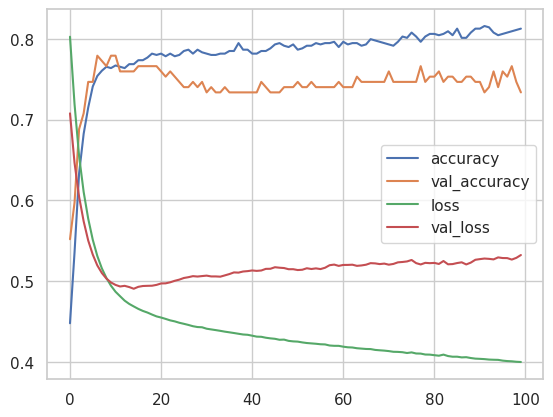

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels = ['accuracy','val_accuracy','loss','val_loss'])
plt.show()

# Hyper Parametr Tuning Using Keras Tuner

In [28]:
pip install -U keras-tuner

In [29]:
import keras_tuner as kt

# 1. Optimizer Tuning

In [30]:
import keras
import keras_tuner as kt
from keras.layers import Dense

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()

    # Add layers
    model.add(Dense(32, activation='relu', input_dim=2))
    model.add(Dense(1, activation='sigmoid'))

    # Hyperparameter tuning for optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer_choice,
                  metrics=['accuracy'])

    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,  # The model-building function
    objective='val_accuracy',  # The objective to optimize
    max_trials=5,  # Number of trials
    directory='my_dir',  # Directory to save results
    project_name='Optimizer Tuning'  # Project name
)

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)


Reloading Tuner from my_dir/Optimizer Tuning/tuner0.json


In [31]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

# 2. Optimizing Number of Neurons

In [32]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(hp):
    model = Sequential()

    # Tune the number of units in the first Dense layer
    units = hp.Int('units', min_value=32, max_value=512, step=32)

    # Add layers
    model.add(Dense(units=units, input_dim=8, activation='relu'))  # Assuming 8 input features
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Maximizing validation accuracy
    max_trials=5,              # Number of hyperparameter configurations to try
    directory='my_dir',         # Directory to store results
    project_name='No. of Neuron Tuning'    # Name of the project (optional)
)

# Perform the search
tuner.search(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)


Reloading Tuner from my_dir/No. of Neuron Tuning/tuner0.json
{'units': 288}


# 3. Optimizing Number of Layers

In [33]:
def build_model(hp):

  model = Sequential()

  model.add(Dense(72,activation = 'relu',input_dim = 8))

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):

    model.add(Dense(72,activation = 'relu'))

  model.add(Dense(1,activation = 'sigmoid'))

  model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 3,
    directory = 'my_dir',
    project_name = 'No. of Layers Tuning'
)

Reloading Tuner from my_dir/No. of Layers Tuning/tuner0.json


In [34]:
tuner.search(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

In [35]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5}

In [36]:
model = tuner.get_best_models(num_models=1)[0]

In [37]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8026 - loss: 0.4193 - val_accuracy: 0.7273 - val_loss: 0.5313
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7970 - loss: 0.4151 - val_accuracy: 0.7273 - val_loss: 0.5262
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8124 - loss: 0.4162 - val_accuracy: 0.7597 - val_loss: 0.5360
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8358 - loss: 0.3690 - val_accuracy: 0.7468 - val_loss: 0.5438
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7920 - loss: 0.4345 - val_accuracy: 0.7662 - val_loss: 0.5499
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7990 - loss: 0.3989 - val_accuracy: 0.7922 - val_loss: 0.5613
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7885 - loss: 0.4305 - val_accuracy: 0.7597 - val_loss: 0.5614
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8329 - loss: 0.3459 - val_accuracy: 0.7403 

#4. Overall Tuning of All Hyper Parameters

In [84]:
def build_model(hp):

    model = Sequential()
    counter = 0  # Counter variable for differentiating First and Hidden Layers

    # Number of layers optimization
    for i in range(1, hp.Int('num_layers', min_value=1, max_value=10)):

        if counter == 0:  # For the 1st Layer input_dim is required
            model.add(
                Dense(
                    units=hp.Int('units_' + str(i), min_value=8, max_value=512, step=8),
                    activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid', 'elu', 'selu']),
                    input_dim=8
                )
            )
            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9])))

        else:  # Except 1st Layer input dimension not required
            model.add(
                Dense(
                    units=hp.Int('units_' + str(i), min_value=8, max_value=512, step=8),
                    activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid', 'elu', 'selu'])
                )
            )

            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9])))



        counter += 1

    # Adding the output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compiling Model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [85]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='Overall Tuning'
)

Reloading Tuner from my_dir/Overall Tuning/tuner0.json


In [86]:
tuner.search(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

In [87]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5,
 'units0': 288,
 'activation0': 'selu',
 'dropout0': 0.4,
 'optimizer': 'nadam',
 'units1': 392,
 'activation1': 'relu',
 'dropout1': 0.8,
 'units2': 40,
 'activation2': 'relu',
 'dropout2': 0.4,
 'units3': 504,
 'activation3': 'sigmoid',
 'dropout3': 0.6,
 'units4': 424,
 'activation4': 'sigmoid',
 'dropout4': 0.5,
 'units5': 408,
 'activation5': 'sigmoid',
 'dropout5': 0.5,
 'units6': 432,
 'activation6': 'tanh',
 'dropout6': 0.2,
 'units7': 144,
 'activation7': 'elu',
 'dropout7': 0.2,
 'units8': 64,
 'activation8': 'elu',
 'dropout8': 0.9,
 'units9': 88,
 'activation9': 'sigmoid',
 'dropout9': 0.3}

In [88]:
tuner.results_summary()

Results summary
Results in my_dir/Overall Tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_layers: 5
units0: 288
activation0: selu
dropout0: 0.4
optimizer: nadam
units1: 392
activation1: relu
dropout1: 0.8
units2: 40
activation2: relu
dropout2: 0.4
units3: 504
activation3: sigmoid
dropout3: 0.6
units4: 424
activation4: sigmoid
dropout4: 0.5
units5: 408
activation5: sigmoid
dropout5: 0.5
units6: 432
activation6: tanh
dropout6: 0.2
units7: 144
activation7: elu
dropout7: 0.2
units8: 64
activation8: elu
dropout8: 0.9
units9: 88
activation9: sigmoid
dropout9: 0.3
Score: 0.7922077775001526

Trial 02 summary
Hyperparameters:
num_layers: 4
units0: 96
activation0: sigmoid
dropout0: 0.1
optimizer: adam
units1: 96
activation1: elu
dropout1: 0.6
units2: 304
activation2: elu
dropout2: 0.1
units3: 264
activation3: selu
dropout3: 0.1
units4: 416
activation4: sigmoid
dropout4: 0.9
units5: 8
activation5: tanh
dropout5: 0.9
Score: 0.792

In [89]:
from tensorflow.keras import backend as K
K.clear_session()

In [90]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hp.values)

{'num_layers': 5, 'units0': 288, 'activation0': 'selu', 'dropout0': 0.4, 'optimizer': 'nadam', 'units1': 392, 'activation1': 'relu', 'dropout1': 0.8, 'units2': 40, 'activation2': 'relu', 'dropout2': 0.4, 'units3': 504, 'activation3': 'sigmoid', 'dropout3': 0.6, 'units4': 424, 'activation4': 'sigmoid', 'dropout4': 0.5, 'units5': 408, 'activation5': 'sigmoid', 'dropout5': 0.5, 'units6': 432, 'activation6': 'tanh', 'dropout6': 0.2, 'units7': 144, 'activation7': 'elu', 'dropout7': 0.2, 'units8': 64, 'activation8': 'elu', 'dropout8': 0.9, 'units9': 88, 'activation9': 'sigmoid', 'dropout9': 0.3}


In [91]:
best_model = tuner.hypermodel.build(best_hp)  # Rebuild the best model without loading weights


In [92]:
callback = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True,min_delta=0.0001)
history=best_model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test),callbacks=callback)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5108 - loss: 0.9226 - val_accuracy: 0.4805 - val_loss: 0.7054
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5360 - loss: 0.8779 - val_accuracy: 0.5325 - val_loss: 0.6900
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5388 - loss: 0.8151 - val_accuracy: 0.5779 - val_loss: 0.6777
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5473 - loss: 0.7657 - val_accuracy: 0.6299 - val_loss: 0.6673
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5757 - loss: 0.7199 - val_accuracy: 0.6623 - val_loss: 0.6588
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6058 - loss: 0.7311 - val_accuracy: 0.6818 - val_loss: 0.6505
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6135 - loss: 0.6875 - val_accuracy: 0.6558 - val_loss: 0.6418
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6426 - loss: 0.6534 - val_accuracy: 0

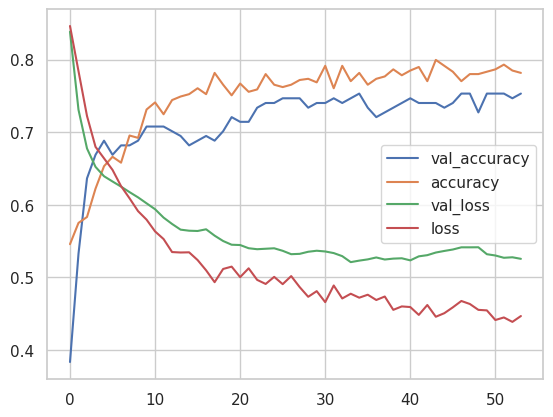

In [83]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(labels = ['val_accuracy','accuracy','val_loss','loss'])
plt.show()